# Porkchop plot
## Computational Astrodynamics 2023-2024
### Aspasia Pallikaridou
This jupyter notebook is about the porkchop plot of the interplanetary transfer of a spacecraft from Earth to Mars. In order to draw the plot, the solution to Lambert's problem was computed for different departure and arrival moments.
# Lambert's problem
In orbital mechanics, Lambert's problem is the determination from the initial and final position vectors and the time of the flight. It posed in the 18th century by John Lambert and solved by Lagrange. It can also be described as a Boundary Value Problem (BVP) for the two-body problem.
The spacecraft in this problem is initially in an orbit around Earth. After that, it is only in the sphere of influence of the Sun and finally, it orbits around Mars because of its gravity. To change from the one SOI to the other, two hyperbola orbits are demonstrated, one at the departure and one at the arrival.
The interplanetary function that is used in this notebook returns the normals of the departure and the arrival hyperbolic velocities:
~𝒗∞,𝐷=vD-vE
~𝒗∞,𝐴=vA-vM
where vE is the velocity of Earth at the moment of departure, vM the velocity of Mars at the moment of arrival, and VD and VA the departure and arrival velocities of the spacecraft, respectively, as they are obtained from Lambert's problem.

# Porkchop plot
The porkchop plot is a fast way to analyze a transfer between two bodies. To be more spesific, it is the contour plots of 𝑐3 = $(𝒗∞,𝐷)^2$ and 𝒗∞,𝐴 for a 2D grid of departure and arrival dates, as they are calculated from the Lambert's prolem's solutions and interplanetary function. The lower c3 is, the lower the (energy) cost of the departure, while the lower 𝒗∞,𝐴 is, the easier it would be to let the spacecraft arrive at the target planet.

In [1]:
# import libraries
import astrodynamicslibrary as astro
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# main script to create and plot the porkchop plot
# Requires: date2jd, interplanetary
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#  planet_id - planet identifier:
#               0 = Mercury
#               1 = Venus
#               2 = Earth
#               3 = Mars
#               4 = Jupiter
#               5 = Uranus
#               7 = Neptune
#               8 = Pluto
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Npoints=100
DepPlanetID=2
ArrPlanetID=3
# Departure window
# Start at 2018-03-01T00:00:00
# End at 2018-06-30T00:00:00
# Use 100 points
Dstart=astro.date2jd(2018,3,1,0,0,0)
Dend=astro.date2jd(2018,6,30,0,0,0)
JDdeparture=np.linspace(Dstart,Dend,Npoints)

# Arrival window
# Start at 2018-09-01T00:00:00
# End at 2019-04-01T00:00:00
# Use 100 points
Astart=astro.date2jd(2018,9,1,0,0,0)
Aend=astro.date2jd(2019,4,1,0,0,0)
JDarrival=np.linspace(Astart,Aend,Npoints)
#JDdeparture,JDarrival=np.meshgrid(departure,arrival)
#  main loop to compute c3 and vinf

X,Y=np.meshgrid(JDdeparture,JDarrival)
vinfd=np.zeros(shape=(Npoints,Npoints));
c3=np.zeros(shape=(Npoints,Npoints));
vinfa=np.zeros(shape=(Npoints,Npoints));
for i in range(Npoints):
    for j in range(Npoints):
        vinfd[i][j],vinfa[i][j]=astro.interplanetary(DepPlanetID,ArrPlanetID,X[i][j],Y[i][j])
        c3[i][j]=vinfd[i][j]**2


In [3]:
# objective function to minimize c3
def objfunc3(X):
    # X = [JDdeparture , JDarrival]
    vinfd,vinfa=astro.interplanetary(DepPlanetID,ArrPlanetID,X[0],X[1])
    c3=vinfd**2
    return c3

# objective function to minimize vinf
def objfunvinf(X):
    # X = [JDdeparture , JDarrival]
    vinfd,vinfA=astro.interplanetary(DepPlanetID,ArrPlanetID,X[0],X[1])
    return vinfA


# find optimal solution using gradient descent
# X bounds
bnds = (( 2458220,2458260 ),(2458425,2458525))
# initial guess
X0 = [ 2458250,2458500 ]
# find minimum for the c3 surface
minC3 = minimize(objfunc3,X0,bounds=bnds)
# find minimum for the Vinf surface
minVinf = minimize(objfunvinf,X0,bounds=bnds)

# Contour plot of the results



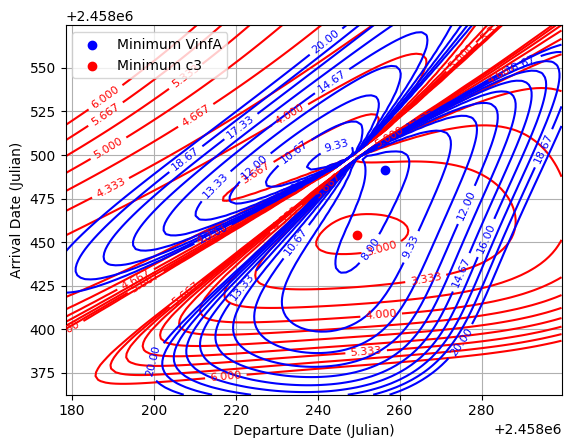

In [4]:
f=plt.figure()
X,Y=np.meshgrid(JDdeparture,JDarrival)
Cc3=plt.contour(X,Y,vinfa,np.linspace(3,6,10),colors='red')
plt.clabel(Cc3, inline=1, fontsize=8)
Cvinfa=plt.contour(X,Y,c3,np.linspace(8,20,10),colors='blue')
plt.clabel(Cvinfa, inline=1, fontsize=8)
plt.scatter(minC3.x[0],minC3.x[1],color='blue',label='Minimum VinfA')

plt.scatter(minVinf.x[0],minVinf.x[1],color='red',label='Minimum c3')
plt.legend()
plt.xlabel('Departure Date (Julian)')
plt.ylabel('Arrival Date (Julian)')
plt.grid()
plt.show()

In [5]:
mvinfd,k=astro.interplanetary(DepPlanetID,ArrPlanetID,minC3.x[0],minC3.x[1])
mc3=mvinfd**2
k,mvinfa=astro.interplanetary(DepPlanetID,ArrPlanetID,minVinf.x[0],minVinf.x[1])

print(f'The minimum for the C3 surface is {mc3:.2f}, with departure date {minC3.x[0]:.2f} and arrival date {minC3.x[1]:.2f}')
print(f'The minimum for the v∞,A surface is {mvinfa:.2f}, with departure date {minVinf.x[0]:.2f} and arrival date {minVinf.x[1]:.2f}')

The minimum for the C3 surface is 7.74, with departure date 2458256.38 and arrival date 2458491.56
The minimum for the v∞,A surface is 2.96, with departure date 2458249.52 and arrival date 2458453.95


## Earth's, Mar's, and satellites's orbits

In [6]:
from lambertsolver import lambertizzo2015 as lambert

In [16]:
def plot_sun():
    plt.scatter(0,0,color='yellow',s=60)
    

def plot_planet(code,date):
    r,v,coe=astro.planet_elements_and_sv(code,date)
    Dt=100000 #step
    planetperiod=astro.period(coe[0],1.327124e11)
    rx=np.zeros(shape=(round(planetperiod/Dt),1));
    ry=np.zeros(shape=(round(planetperiod/Dt),1));
    for i in range(round(planetperiod/Dt)):
        r,v=astro.kep_propagate(coe,i*Dt,1.327124e11)
        rx[i]=r[0]
        ry[i]=r[1]       
        
    if (code == 2) :
        plt.scatter(rx,ry,color='blue',s = 0.2)
    elif (code ==3):
        plt.scatter(rx,ry,color='red', s = 0.2)
    else:
        plt.scatter(rx,ry,s=0.2)

    #point where planet and satellite meet
    plt.scatter(rx[0],ry[0],color='black',s=10)
    

def plot_interplanetary(coded,codea,dated,datearr,depr,depv,arrir):
    #Earth
    plot_planet(coded,dated)
    #Mars
    plot_planet(codea,datearr)
    # Satellite
    tof=(datearr-dated)
    Satellitevd,Satelliteva=lambert(1.327124e11,depr,arrir,tof)
    Satcoe=astro.coe_from_sv(depr,Satellitevd+depv,1.327124e11)
    arriRinit,arriVinit,coe=astro.planet_elements_and_sv(codea,datearr)
    Satcoe[0]=(np.linalg.norm(depr)+np.linalg.norm(arriRinit))/2
    Satcoe[1]=(np.linalg.norm(Earthr)-np.linalg.norm(arriRinit))/(np.linalg.norm(depr)+np.linalg.norm(arriRinit))
    Satcoe[4]=0
    Satcoe[5]=180
    Dts=10000
    
    Srx=np.zeros(shape=(round(tof*86400/Dts),1));
    Sry=np.zeros(shape=(round(tof*86400/Dts),1));
    for i in range(round(tof*86400/Dts)):
        r,v=astro.kep_propagate(Satcoe,i*Dts,1.327124e11)
        Srx[i]=r[0]
        Sry[i]=r[1]
    plt.scatter(Srx,Sry,color='black',s=0.1)
    
    # Sun
    plot_sun()
    plt.xlabel('Km')
    plt.ylabel('Km')
    plt.grid()

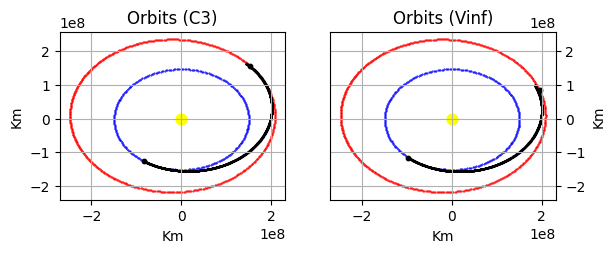

In [17]:
c3plot=plt.subplot(2, 2, 1) #Orbits for the minimization of energy c3
# Earth at the departure
Earthr,Earthv,Earthcoe=astro.planet_elements_and_sv(2,minC3.x[0])
# Mars at the arrival
Marsr,Marsv,Marscoe=astro.planet_elements_and_sv(3,minC3.x[1])
plot_interplanetary(2,3,minC3.x[0],minC3.x[1],Earthr,Earthv,Marsr)
plt.title('Orbits (C3)')




vinfplot=plt.subplot(2, 2, 2) #Orbits for the minimization of arrival velocity vinf
vinfplot.yaxis.set_label_position("right")
vinfplot.yaxis.tick_right()
# Earth at the departure
Earthr,Earthv,Earthcoe=astro.planet_elements_and_sv(2,minVinf.x[0])
# Mars at the arrival
Marsr,Marsv,Marscoe=astro.planet_elements_and_sv(3,minVinf.x[1])
plot_interplanetary(2,3,minVinf.x[0],minVinf.x[1],Earthr,Earthv,Marsr)
plt.title('Orbits (Vinf)')

plt.show()
    